# Group project - NATIONAL TOURISM PROMOTION<br>

### This notebook uses the EuropeTop100Attractions_ENG_20190101_20210821 and the Holidays.csv datasets


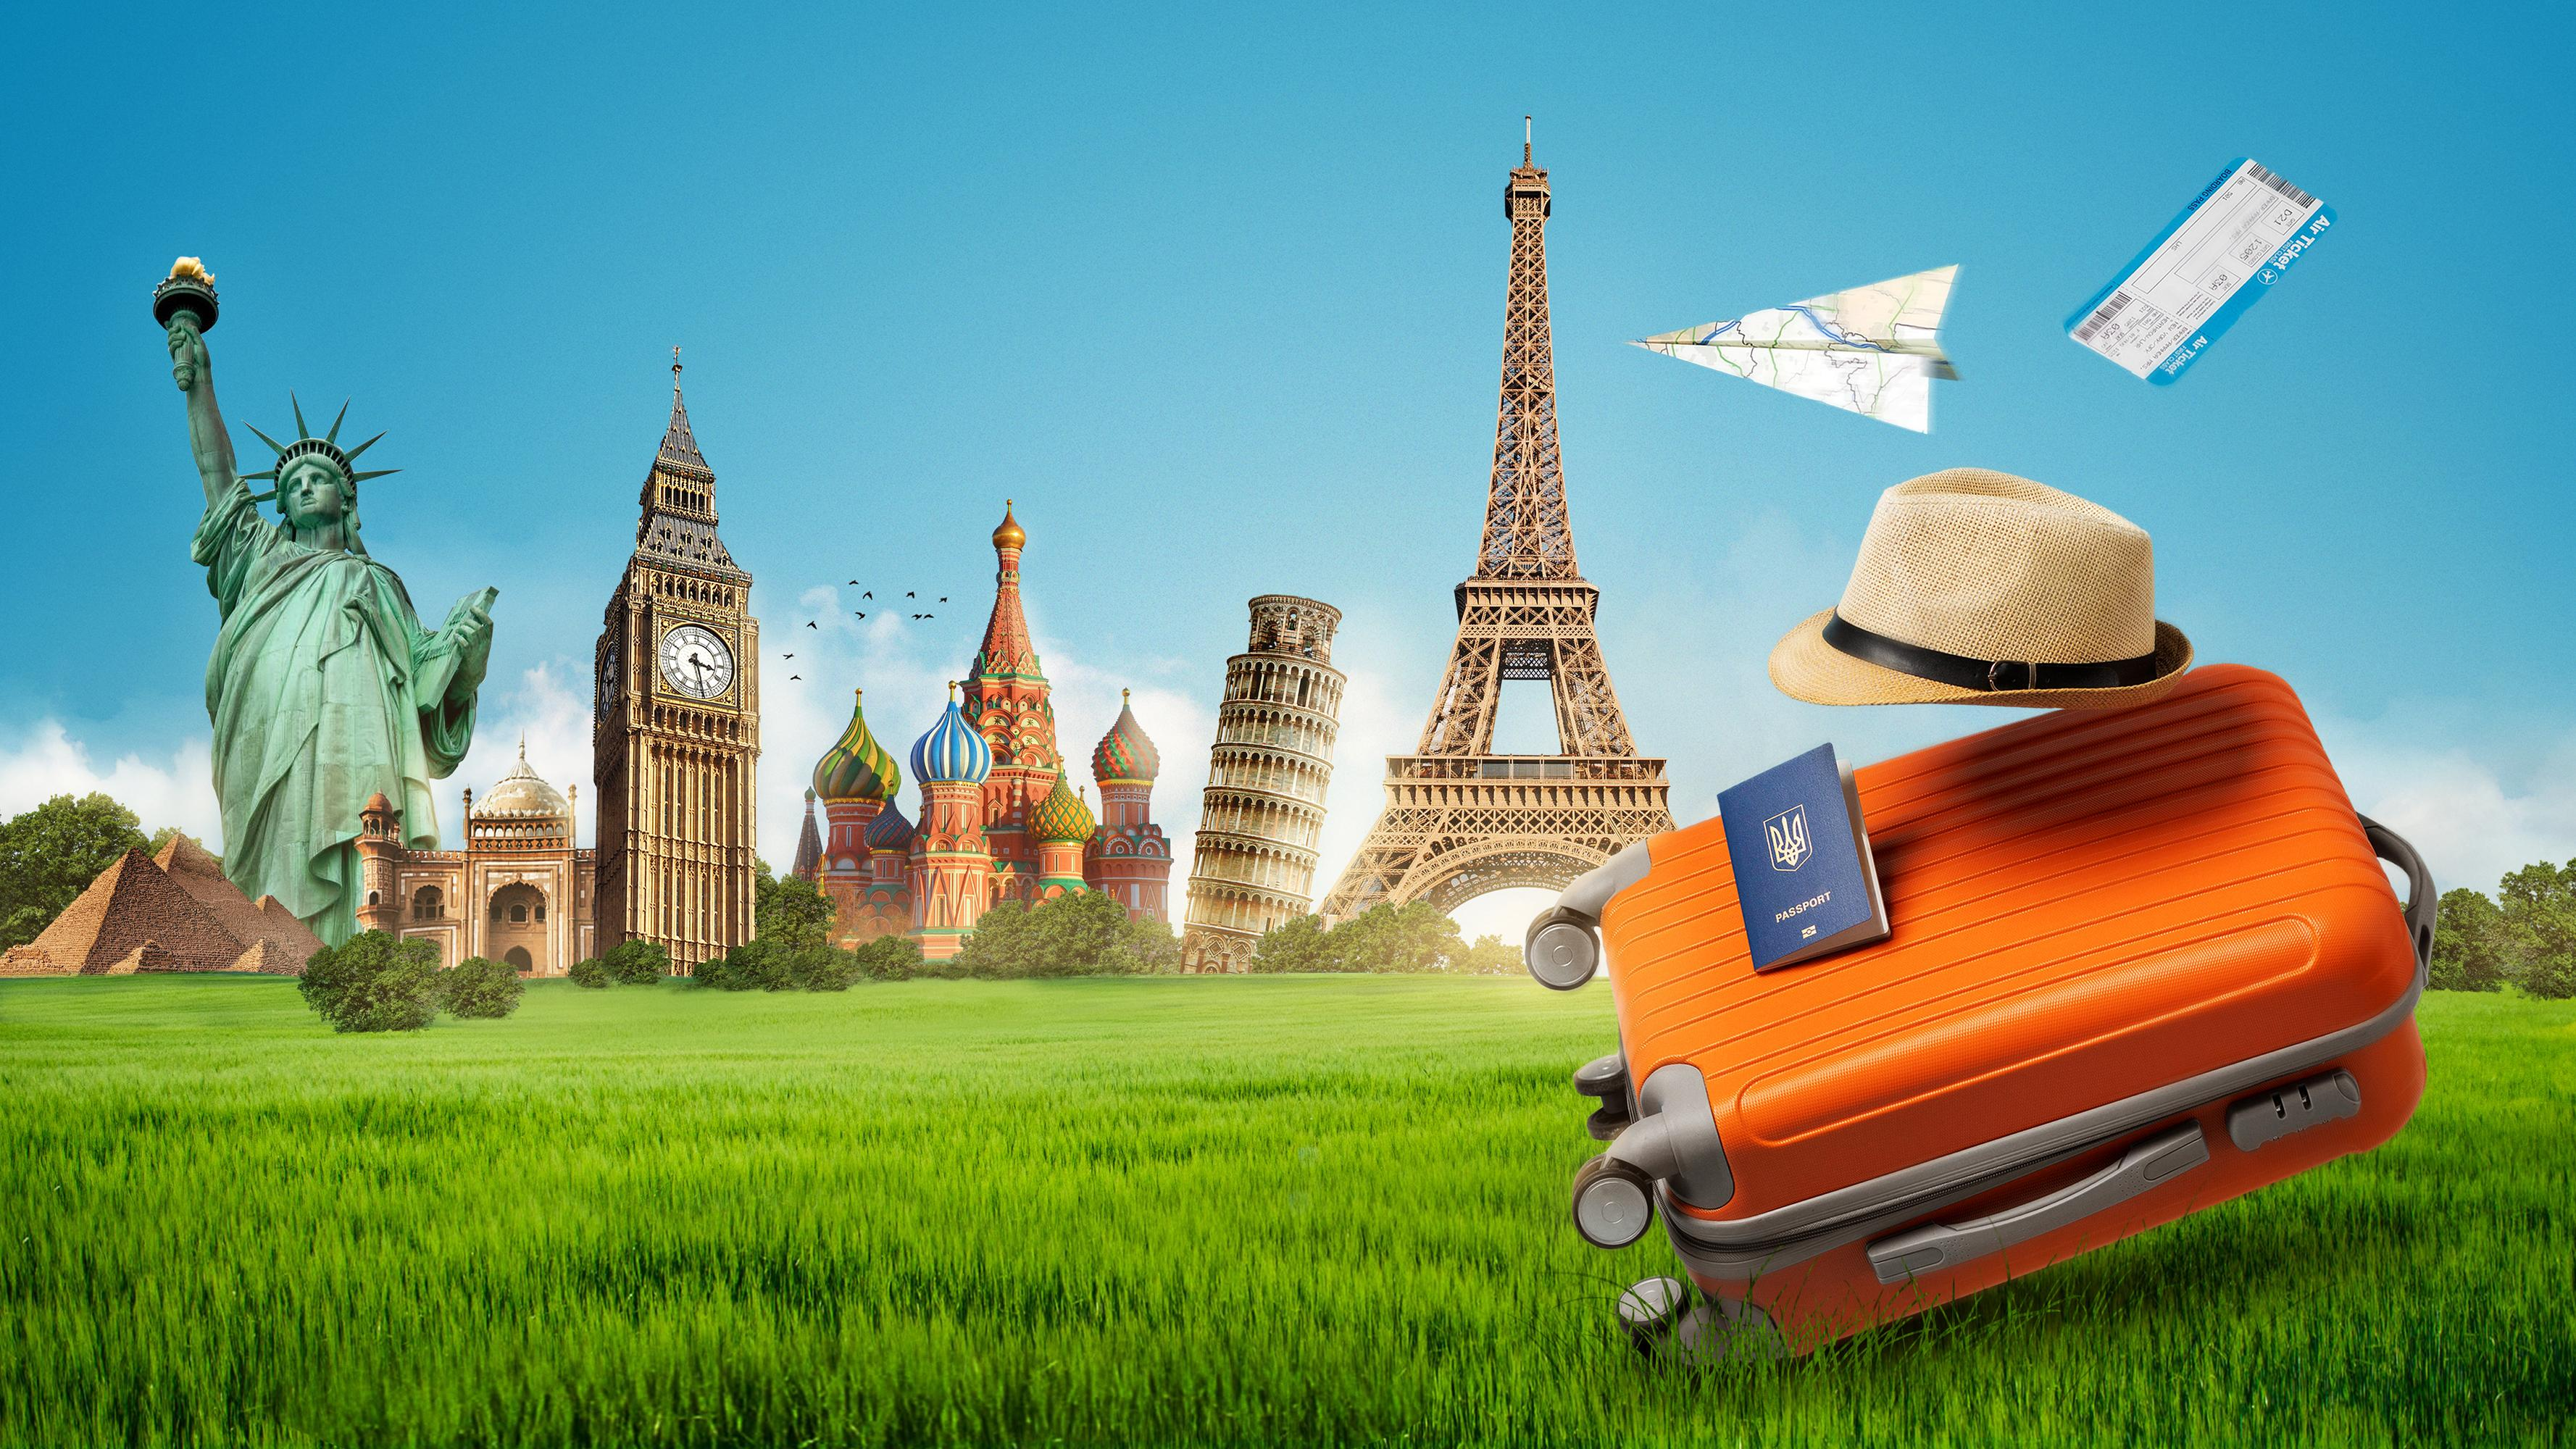

In [4]:
#Work description
#Tourism was hit hard by the COVID-19 pandemic. National Tourism Board Organizations (NTBO) want to study users' generated content, such as Social Media reviews, to understand visitors patterns and if these patterns were affected by the pandemic.

#Employing the CRISP-DM process model, your group are expected to act as a consultant for the Portuguese NTBO. Your job is to characterize and describe the patterns of visitants of Portuguese attractions and comparing it to Portugal's main tourism competitors. In addition, you can try to understand visitors' frequent itemset associations, similarities between attractions or visitors, or segment visitors using RFM (replacing Monetization by ratings for example).

#Examples of the type of analysis that can be done:

#Comparison of reviews frequency and rating distribution before and after the pandemic
#Comparison of the type of trip and origin of visitors

### Importing all the necessery packages

In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The csv data set for the "Top 100 Attactions in Europe" has a value ds.

In [9]:
ds = pd.read_csv('EuropeTop100Attractions.csv', sep=";")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   localID            92120 non-null  object
 1   extractionDate     92120 non-null  object
 2   globalRating       92120 non-null  object
 3   positionOnRanking  92120 non-null  int64 
 4   sitesOnRanking     92120 non-null  int64 
 5   totalReviews       92120 non-null  int64 
 6   userName           92100 non-null  object
 7   userLocation       78652 non-null  object
 8   userContributions  92120 non-null  int64 
 9   tripType           63052 non-null  object
 10  reviewWritten      92120 non-null  object
 11  reviewVisited      91410 non-null  object
 12  reviewRating       92120 non-null  int64 
 13  reviewLanguage     92120 non-null  object
 14  reviewFullText     92120 non-null  object
dtypes: int64(5), object(10)
memory usage: 10.5+ MB


###  UserContributions is a numeric value, it tells us how many reviews have the user wrote in TripAdvisor at the moment of the extraction of the review. Because we have users with a huge amount ot written reviews, we are finding the autliers using a plot.

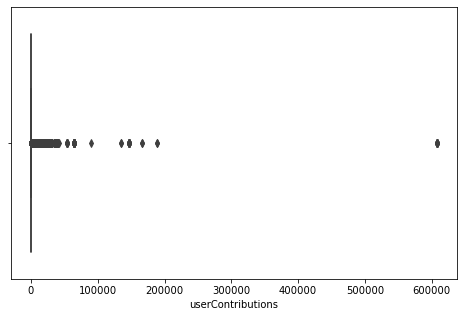

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.boxplot(data=ds, x='userContributions')

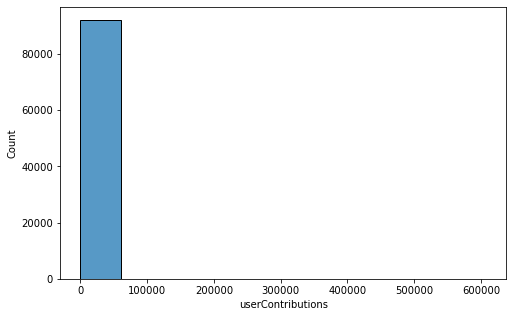

In [16]:
# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = sns.histplot(ds['userContributions'], bins=10, kde=False)

### As we can see that the autliers, we are creating a new value named under1000 that has less than 500000 userContributions showed on a plot.

In [18]:
under1000 = ds[ds["userContributions"] <50000]

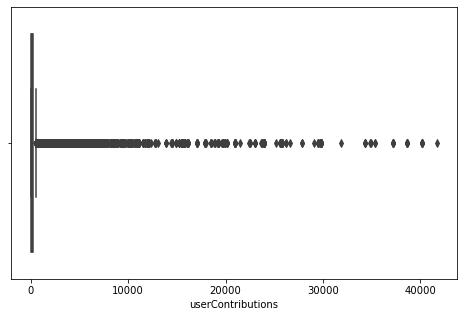

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
g = sns.boxplot(data=under1000, x='userContributions')

## Measures of central tendency<br> Strange mean values or a big difference between the mean and median, big standard deviation.

In [23]:
ds["userContributions"].describe()

count     92120.000000
mean        477.520560
std        7270.518677
min           0.000000
25%          20.000000
50%          66.000000
75%         215.000000
max      607732.000000
Name: userContributions, dtype: float64

In [24]:
ds["userContributions"].median()

66.0

In [25]:
ds["userContributions"].mode()

0    3
Name: userContributions, dtype: int64

# how to find outliers
We can keep the data until 507 <br>
    Q3+1,5*Q3-Q1 WHERE Q3 = 215; Q1 = 20
  
    

In [41]:
print(215+1.5*(215-20))

507.5


## Z-score Method

In [40]:
upper_limit = ds["userContributions"].mean() + 3*ds["userContributions"].std()
lower_limit = ds["userContributions"].mean() - 3*ds["userContributions"].std()
print("upper_limit:", upper_limit)
print("lower_limit:", lower_limit)

upper_limit: 22289.076590307843
lower_limit: -21334.035470029943


In [43]:
#find the ouliers
ds.loc[(ds["userContributions"] > upper_limit) | (ds["userContributions"] < lower_limit)]

,localID,extractionDate,globalRating,positionOnRanking,sitesOnRanking,totalReviews,userName,userLocation,userContributions,tripType,reviewWritten,reviewVisited,reviewRating,reviewLanguage,reviewFullText
1243,MAG001,2021-08-20,"4,5",1,1186,163828,KodoDrummer@KodoDrummer,"Yekaterinburg, Russia",63930,NaN,2019-11-30,2019-11-01,5,en,An architectural marvel. I would not classify ...
6176,MAG001,2021-08-20,"4,5",1,1186,163828,Dimitris L@750dimitrisl,"Sydney, Australia",29844,Couples,2019-04-29,2018-10-01,5,en,This is an unfinished masterpiece! Work has be...
6186,MAG001,2021-08-20,"4,5",1,1186,163828,Dimitris L@750dimitrisl,"Sydney, Australia",29844,Couples,2019-04-29,2018-10-01,5,en,This is an unfinished masterpiece! Work has be...
7494,MAG001,2021-08-20,"4,5",1,1186,163828,KodoDrummer@KodoDrummer,"Yekaterinburg, Russia",63930,Friends,2019-02-23,2019-02-01,5,en,Avoid the long lines by purchasing your ticket...
7699,MAG001,2021-08-20,"4,5",1,1186,163828,Chrella@Chrella,Italy,40164,Couples,2019-02-11,2018-12-01,5,en,"This can't be missed, it is fabulous. Finally ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89897,MAG089,2021-08-21,"4,5",4,119,6045,macedonboy@macedonboy,"Glasgow, UK",146634,Solo,2019-04-18,2019-04-01,5,en,"Not at all what I expected from an Alcazar, lo..."
89907,MAG089,2021-08-21,"4,5",4,119,6045,macedonboy@macedonboy,"Glasgow, UK",146634,Solo,2019-04-18,2019-04-01,5,en,"Not at all what I expected from an Alcazar, lo..."
90865,MAG092,2021-08-21,"4,5",3,66,5809,SEs@7SE3,"London, UK",25845,Friends,2019-02-26,2019-02-01,5,en,The old town area is full of restaurants.You n...
91012,MAG093,2021-08-21,"4,5",1,101,6805,Dimitris L@750dimitrisl,"Sydney, Australia",29857,Couples,2019-04-10,2018-10-01,4,en,This mode of transport is really good for a fe...
